In [2]:
import sys
sys.path.append('/home/shiftpub/Dynamic_AMM/inf_step_exp/parametric_approach')
from parametric import ParametricValueModel

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from parametric import ParametricValueModel
from matplotlib.gridspec import GridSpec

# Define parameter values
L = 100
mu = 0.0
sigma_values = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma_values = [0.5, 0.6, 0.7, 0.8, 0.9]
delta_t_values = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.05, 0.1]

sigma_values = [0.01]
gamma_values = [0.005]
delta_t_values = [0.001]

# Run parameter sweep
results = []
for sigma in sigma_values:
    for gamma in gamma_values:
        for delta_t in delta_t_values:
            model = ParametricValueModel(L=L, mu=mu, sigma=sigma, gamma=gamma, delta_t=delta_t)
            parametric_df = model.generate_raw_data(k = 1, num_samples=1)
            parametric_df.loc[:, 'L'] = L
            parametric_df.loc[:, 'lfs'] = 2 * parametric_df['L'] * np.sqrt(parametric_df['p']) * (1 - np.exp(-sigma**2 * delta_t / 8))
            print(f"lhs: {parametric_df['lfs']} ")
            print(f"rhs: {parametric_df['fin']}")
            # Count how many rows lfs is less than fin/fout
            num_time_to_continue_in = (parametric_df['lfs'] < parametric_df['fin']).sum()
            num_time_to_continue_out = (parametric_df['lfs'] < parametric_df['fout']).sum()
            
            results.append({
                'sigma': sigma, 
                'gamma': gamma, 
                'delta_t': delta_t, 
                'continue_in': num_time_to_continue_in, 
                'continue_out': num_time_to_continue_out
            })

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_markdown())
# plot_comparison_table(results_df)   

p: [4.0201005], x: [50.], y: [200.]
incoming_term1: [99.99999875], incoming_term2: [1.45359247e-218], incoming_term3: [99.98738434]
incoming_fee: [6.33890078e-05]
lhs: 0    0.000005
Name: lfs, dtype: float64 
rhs: 0    0.000063
Name: fin, dtype: float64
|    |   sigma |   gamma |   delta_t |   continue_in |   continue_out |
|---:|--------:|--------:|----------:|--------------:|---------------:|
|  0 |    0.01 |   0.005 |     0.001 |             1 |              1 |


In [ ]:
from scipy.stats import norm
import numpy as np
from tqdm import tqdm

gamma = 0.1
sigma = 0.1
delta_t = 0.1
k = 0
L = 100
x = 200
y = L**2 / x
p = (y/x) / (1-gamma)**(k)
results = []

for s in np.arange(0.0001, 8, 0.0001):
    A = np.exp(-1/8 * s**2)
    d1 = np.log((1-gamma) * y / (p * x)) / (s)
    d2 = np.log(y/((1-gamma) * p * x)) / (s)
    d1_plus = d1 + s / 2
    d1_minus = d1 - s / 2
    d2_plus = d2 + s / 2
    d2_minus = d2 - s / 2
    
    first_term = 1 - A 
    second_term = np.sqrt(1-gamma) * A * norm.cdf(d1)
    third_term = norm.cdf(d1_minus)
    rhs = (gamma/(1-gamma)) * (second_term - third_term)
    lhs = first_term
    diff = lhs - rhs
    
    results.append({
                    's': s,
                    'first_term': first_term,
                    'second_term': second_term,
                    'third_term': third_term,
                    'diff': diff})


results_df = pd.DataFrame(results)
print(f"minimum difference: {results_df['diff'].min()}")
# select rows where difference is larger than third term
plt.plot(results_df['s'], results_df['diff'])
plt.xlabel('sigma * sqrt(delta_t)')
plt.ylabel('difference')
plt.title('difference between lhs and rhs')
# plt.plot(results_df['gamma'], results_df['diff2'])
plt.show()


In [ ]:
from scipy.stats import norm
import numpy as np
from tqdm import tqdm

gamma = 0.1
sigma = 0.1
delta_t = 0.1
k = 0.5
L = 100
x = 200
y = L**2 / x
p = (y/x) / (1-gamma)**(k)
results = []

for s in np.arange(0.0001, 8, 0.0001):
    A = np.exp(-1/8 * s**2)
    d1 = np.log((1-gamma) * y / (p * x)) / (s)
    d2 = np.log(y/((1-gamma) * p * x)) / (s)
    d1_plus = d1 + s / 2
    d1_minus = d1 - s / 2
    d2_plus = d2 + s / 2
    d2_minus = d2 - s / 2
    
    rhs_first_term = (gamma/np.sqrt(1-gamma)) * (A * (norm.cdf(d1) + norm.cdf(-d2)))
    rhs_second_term = (gamma/np.sqrt(1-gamma)) * (np.sqrt((1-gamma)**(k-1)) * (norm.cdf(d1_minus) + norm.cdf(-d2_plus)))
    rhs = rhs_first_term - rhs_second_term
    lhs = 2 * (1-A)
    diff = lhs - rhs
    results.append({
                    's': s,
                    'rhs_first_term': rhs_first_term,
                    'rhs_second_term': rhs_second_term,
                    'diff': diff})


results_df = pd.DataFrame(results)
# print(f"minimum difference: {results_df['diff'].min()}")
# select rows where difference is larger than third term
plt.plot(results_df['s'], results_df['rhs_first_term'])
plt.plot(results_df['s'], results_df['rhs_second_term'])
plt.legend(['rhs_first_term', 'rhs_second_term'])
# plt.xlabel('sigma * sqrt(delta_t)')
# plt.ylabel('difference')
# plt.title('difference between lhs and rhs')
# plt.plot(results_df['gamma'], results_df['diff2'])
plt.show()


In [ ]:
from scipy.stats import norm
import numpy as np
from tqdm import tqdm

gamma = 0.5
sigma = 0.1
delta_t = 0.1
k = 1
L = 100
x = 200
y = L**2 / x
p = (y/x) / (1-gamma)**(k)
results = []

for s in np.arange(0.0001, 1, 0.00001):
    A = np.exp(-1/8 * s**2)
    d1 = np.log((1-gamma) * y / (p * x)) / (s)
    d2 = np.log(y/((1-gamma) * p * x)) / (s)
    d1_plus = d1 + s / 2
    d1_minus = d1 - s / 2
    d2_plus = d2 + s / 2
    d2_minus = d2 - s / 2
    
    rhs_first_term = (gamma/np.sqrt(1-gamma)) * (A * (norm.cdf((1+k) * np.log(1-gamma)/s) + norm.cdf((1-k) * np.log(1-gamma)/s)))
    rhs_second_term = (gamma/np.sqrt(1-gamma)) * (np.sqrt((1-gamma)**(k-1))) * (norm.cdf((1+k) * np.log(1-gamma)/s - s/2) + norm.cdf((1-k) * np.log(1-gamma)/s - s/2))
    rhs = rhs_first_term - rhs_second_term
    lhs = 2 * (1-A)
    diff = lhs - rhs
    results.append({
                    's': s,
                    'rhs_first_term': rhs_first_term,
                    'rhs_second_term': rhs_second_term, 
                    'lhs': lhs,
                    'rhs': rhs,
                    'diff': diff})



# plt.xlabel('sigma * sqrt(delta_t)')
# plt.ylabel('difference')
# plt.title('difference between lhs and rhs')
# plt.plot(results_df['gamma'], results_df['diff2'])



In [ ]:
results_df = pd.DataFrame(results)
# print(f"minimum difference: {results_df['diff'].min()}")
# select rows where difference is larger than third term
plt.plot(results_df['s'], results_df['lhs'], color='orange')
plt.plot(results_df['s'], results_df['rhs'], color='blue')
plt.legend(['lhs', 'rhs'])
plt.show()

In [186]:
from scipy.stats import norm
import numpy as np
from tqdm import tqdm


def plot_lhs_rhs(k):
    gamma = 0.05
    sigma = 0.1
    delta_t = 0.0001
    L = 100
    x = 200
    y = L**2 / x
    p = (y/x) / (1-gamma)**(k)
    results = []

    for s in np.arange(0.0001, 0.1, 0.0001):
        A = np.exp(-1/8 * s**2)
        d1 = np.log((1-gamma) * y / (p * x)) / (s)
        d2 = np.log(y/((1-gamma) * p * x)) / (s)
        d1_plus = d1 + s / 2
        d1_minus = d1 - s / 2
        d2_plus = d2 + s / 2
        d2_minus = d2 - s / 2
        
        if k >= 0:
            coef = np.sqrt((1-gamma)**(k-1))
        else:
            coef = np.sqrt(1 / (1-gamma)**(k+1))
        
        rhs_first_term = (gamma/np.sqrt(1-gamma)) * (A * (norm.cdf((1+k) * np.log(1-gamma)/s) + norm.cdf((1-k) * np.log(1-gamma)/s)))
        rhs_second_term = (gamma/np.sqrt(1-gamma)) * (coef) * (norm.cdf((1+k) * np.log(1-gamma)/s - s/2) + norm.cdf((1-k) * np.log(1-gamma)/s - s/2))
        rhs = rhs_first_term - rhs_second_term
        lhs = 2 * (1-A)
        diff = lhs - rhs
        results.append({
                        's': s,
                        'rhs_first_term': rhs_first_term,
                        'rhs_second_term': rhs_second_term, 
                        'lhs': lhs,
                        'rhs': rhs,
                        'diff': diff})

    results_df = pd.DataFrame(results)
    plt.figure(figsize=(8, 5))
    plt.plot(results_df['s'], results_df['lhs'], color='orange')
    plt.plot(results_df['s'], results_df['rhs'], color='blue')
    plt.legend(['lhs', 'rhs'])
    plt.xlabel('sigma * sqrt(delta_t)')
    plt.ylabel('difference')
    plt.title(f'lhs - rhs, k = {k}, minimum difference = {results_df["diff"].min():.4f}')
    plt.show()



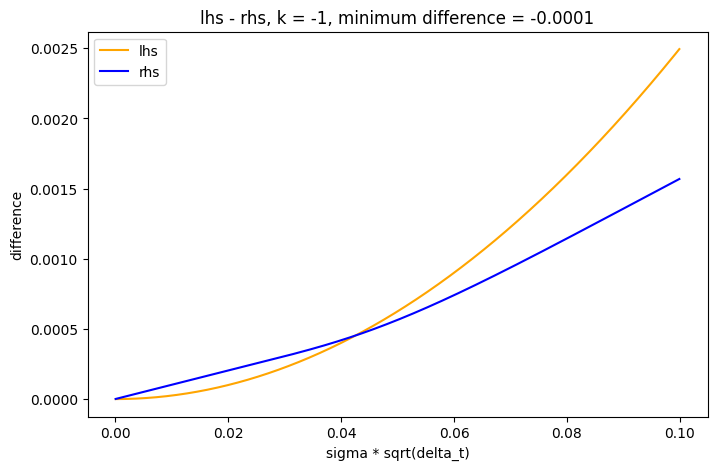

In [187]:
plot_lhs_rhs(-1)

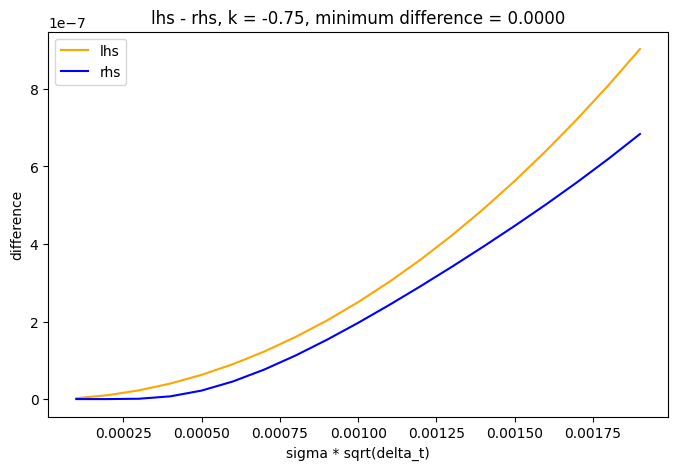

In [177]:
plot_lhs_rhs(-0.75)

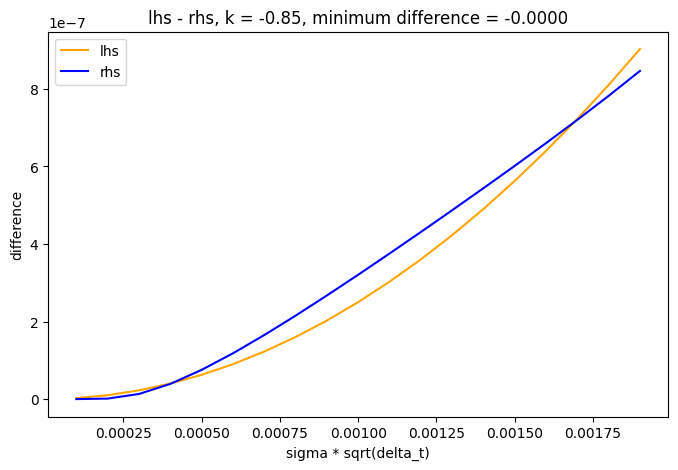

In [178]:
plot_lhs_rhs(-0.85)

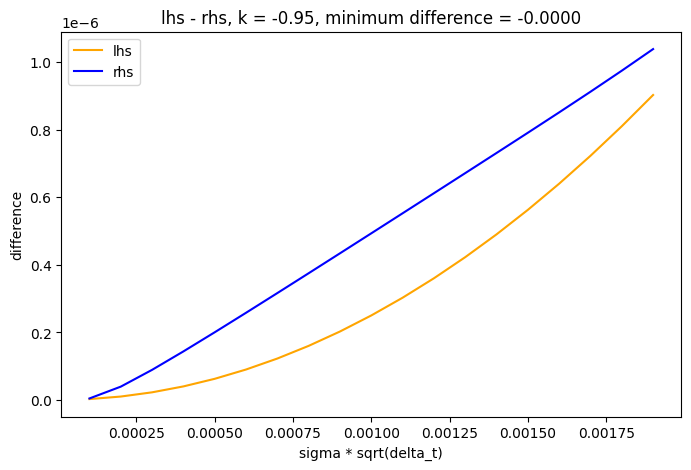

In [179]:
plot_lhs_rhs(-0.95)

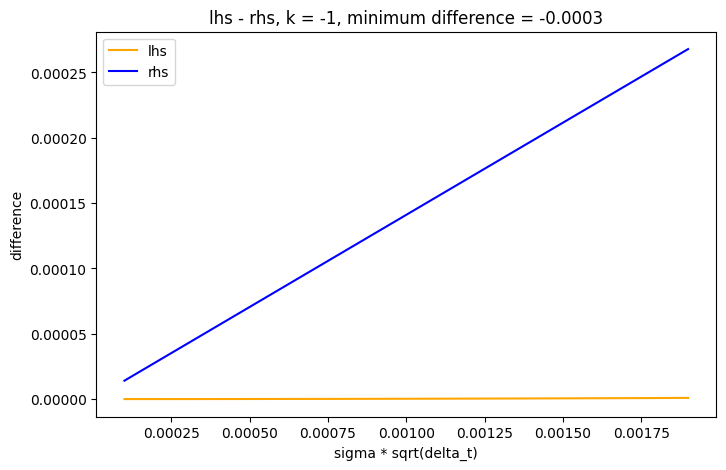

In [181]:
plot_lhs_rhs(-1)

In [ ]:
# plt.plot(results_df['s'], results_df['lhs'])
plt.plot(results_df['s'], results_df['rhs'], color='blue')
plt.legend(['rhs'])
plt.xlabel('sigma * sqrt(delta_t)')
# plt.ylabel('difference')
# plt.title('difference between lhs and rhs')
# plt.plot(results_df['gamma'], results_df['diff2'])
plt.show()

In [147]:
from scipy.stats import norm
import numpy as np
from tqdm import tqdm


def plot_lhs_rhs(k):
    gamma = 0.003
    sigma = 0.1
    delta_t = 0.0001
    L = 100
    x = 50
    y = L**2 / x
    p = (y/x) / (1-gamma)**(k)
    results = []
    print(f"x: {x}, y: {y}, p: {p}")
    for s in np.arange(0.0001, 1, 0.0001):
        A = np.exp(-1/8 * s**2)
        d1 = (1+k) * np.log(1-gamma) / s
        d2 = (k-1) * np.log(1-gamma) / s
        d1_plus = d1 + s / 2
        d1_minus = d1 - s / 2
        d2_plus = d2 + s / 2
        d2_minus = d2 - s / 2
        
        rhs_first_term = (gamma/(1-gamma)) * (L * A * np.sqrt((1-gamma) * p) * (norm.cdf(d1) + norm.cdf(-d2)))
        rhs_second_term = (gamma/(1-gamma)) * (p*x*norm.cdf(d1_minus) + y*norm.cdf(-d2_plus))
        rhs = rhs_first_term - rhs_second_term
        lhs = 2 * L * np.sqrt(p) * (1-A)
        diff = lhs - rhs
        results.append({
                        's': s,
                        'rhs_first_term': rhs_first_term,
                        'rhs_second_term': rhs_second_term, 
                        'lhs': lhs,
                        'rhs': rhs,
                        'diff': diff})

    results_df = pd.DataFrame(results)
    # print the break even point where the lhs and rhs are the closest
    break_even_point = results_df.iloc[results_df['diff'].abs().idxmin()]['s']
    print(f"break even point: {break_even_point}")
    plt.figure(figsize=(8, 5))
    plt.plot(results_df['s'], results_df['lhs'], color='orange')
    plt.plot(results_df['s'], results_df['rhs'], color='blue')
    plt.legend(['lhs', 'rhs'])
    plt.xlabel('sigma * sqrt(delta_t)')
    plt.ylabel('difference')
    plt.title(f'lhs - rhs, k = {k}, minimum difference = {results_df["diff"].min():.4f}')
    plt.show()



x: 50, y: 200.0, p: 4.012036108324975
break even point: 0.0024


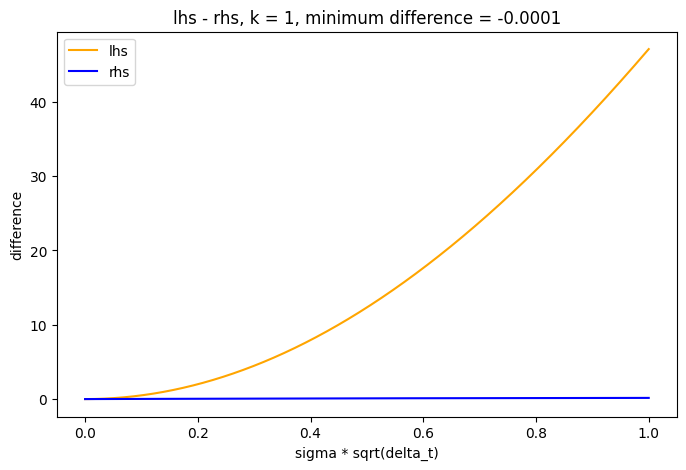

In [148]:
plot_lhs_rhs(1)

In [149]:
# first approach
mu = 0
sigma = 0.1
sqrt_delta_t = 0.0001
delta_t = sqrt_delta_t**2
gamma = 0.0003
k = 0.5
L = 100
x = 50
y = L**2 / x
p = (y/x) / (1-gamma)**(k)


alpha = L * np.sqrt((1-gamma) * p) * np.exp(mu*delta_t/2 - sigma**2 * delta_t/8)
beta = L * ((2-gamma)/np.sqrt(1-gamma)) * np.sqrt(p) * np.exp((0.5*mu-0.125*sigma**2)*delta_t)
d1 = (np.log((1-gamma)*y/(p*x)) - mu*delta_t) / (sigma * np.sqrt(delta_t))
d2 = (np.log(y/((1-gamma)*p*x)) - mu*delta_t) / (sigma * np.sqrt(delta_t))
incoming_term1 = alpha * (norm.cdf(d1) + norm.cdf(-d2))
incoming_term2 = np.exp(mu*delta_t) * p*x * norm.cdf(d1 - 0.5*sigma*np.sqrt(delta_t))
incoming_term3 = y * norm.cdf(-d2 - 0.5*sigma*np.sqrt(delta_t))
print(f"incoming_term1: {incoming_term1}, incoming_term2: {incoming_term2}, incoming_term3: {incoming_term3}")
incoming_fee = (gamma/(1-gamma)) * (incoming_term1 - incoming_term2 - incoming_term3)
print(f"incoming_fee from first approach: {incoming_fee}")

# second approach
s = sigma * np.sqrt(delta_t)
A = np.exp(-1/8 * s**2)
d1 = (1+k) * np.log(1-gamma) / s
d2 = (k-1) * np.log(1-gamma) / s
d1_plus = d1 + s / 2
d1_minus = d1 - s / 2
d2_plus = d2 + s / 2
d2_minus = d2 - s / 2


incoming_term1 = L * A * np.sqrt((1-gamma)*p) * (norm.cdf(d1) + norm.cdf(-d2))
incoming_term2 = p*x*norm.cdf(d1_minus)
incoming_term3 = y*norm.cdf(-d2_plus)
print(f"incoming_term1: {incoming_term1}, incoming_term2: {incoming_term2}, incoming_term3: {incoming_term3}")
incoming_fee = (gamma/(1-gamma)) * (incoming_term1 - incoming_term2 - incoming_term3)
print(f"incoming_fee from second approach: {incoming_fee}")


# third approach
incoming_term1 = L * A * np.sqrt((1-gamma)*p) * (norm.cdf(d1) + norm.cdf(-d2))
incoming_term2 = (L * np.sqrt(p*(1-gamma)**k))*norm.cdf(d1_minus)
incoming_term3 = (L * np.sqrt(p*(1-gamma)**k))*norm.cdf(-d2_plus)
print(f"incoming_term1: {incoming_term1}, incoming_term2: {incoming_term2}, incoming_term3: {incoming_term3}")
incoming_fee = (gamma/(1-gamma)) * (incoming_term1 - incoming_term2 - incoming_term3)
print(f"incoming_fee from third approach: {incoming_fee}")

print(f"d1_minus: {d1_minus}, d2_plus: {d2_plus}")


incoming_term1: 7.096623222072824e-49, incoming_term2: 0.0, incoming_term3: 7.09662087745262e-49
incoming_fee from first approach: 7.035971401835548e-59
incoming_term1: 7.096623222018021e-49, incoming_term2: 0.0, incoming_term3: 7.096620877398123e-49
incoming_fee from second approach: 7.03597048542825e-59
incoming_term1: 7.096623222018021e-49, incoming_term2: 0.0, incoming_term3: 7.096620877398123e-49
incoming_fee from third approach: 7.03597048542825e-59
d1_minus: -45.006756350298865, d2_plus: 15.00225545009962


In [141]:
import numpy as np
from scipy.stats import norm
import multiprocessing as mp
from functools import partial
import pandas as pd
import time
from tqdm import tqdm

def find_best_s_for_params(args):
    """Find the s value that minimizes the difference for a given set of parameters"""
    gamma, k, L, x, s_values = args
    
    # Skip invalid parameter combinations
    if gamma >= 1.0:
        return gamma, k, None, float('inf')
    
    y = L**2 / x
    p = (y/x) / (1-gamma)**k
    
    min_diff = float('inf')
    best_s = None
    
    for s in s_values:
        A = np.exp(-1/8 * s**2)
        log_1_minus_gamma = np.log(1-gamma)
        
        # Pre-calculate common terms
        term1 = (1+k) * log_1_minus_gamma / s
        term2 = (1-k) * log_1_minus_gamma / s
        
        # Determine coefficient based on k
        if k >= 0:
            coef = np.sqrt((1-gamma)**(k-1))
        else:
            coef = np.sqrt(1 / (1-gamma)**(k+1))
        
        # Calculate right-hand side terms
        gamma_term = gamma / np.sqrt(1-gamma)
        rhs_first_term = gamma_term * A * (norm.cdf(term1) + norm.cdf(term2))
        rhs_second_term = gamma_term * coef * (norm.cdf(term1 - s/2) + norm.cdf(term2 - s/2))
        rhs = rhs_first_term - rhs_second_term
        
        # Calculate left-hand side
        lhs = 2 * L * np.sqrt(p) * (1-A)
        
        # Calculate difference
        diff = abs(lhs - rhs)  # Using absolute difference
        
        if diff < min_diff:
            min_diff = diff
            best_s = s
    
    return gamma, k, best_s, min_diff

def process_chunk(chunk, L, x, s_values):
    """Process a chunk of parameter combinations with tqdm progress bar"""
    results = []
    for gamma, k in tqdm(chunk, desc="Processing chunk"):
        result = find_best_s_for_params((gamma, k, L, x, s_values))
        results.append(result)
    return results

def main():
    # Initial parameters
    L = 100
    x = 50
    
    # Create parameter grids
    gammas = np.linspace(0.0001, 0.9999, 100)  # Reduced from 1000 to 100
    ks = np.linspace(-1, 1, 100)               # Reduced from 1000 to 100
    s_values = np.linspace(0.0001, 1, 1000)    # Keep 1000 points for s
    
    total_combinations = len(gammas) * len(ks)
    print(f"Finding breakeven s for {total_combinations} parameter combinations...")
    start_time = time.time()
    
    # Create all parameter combinations
    param_combinations = [(gamma, k) for gamma in gammas for k in ks]
    
    # Split combinations into chunks for multiprocessing
    num_cores = mp.cpu_count()
    print(f"Using {num_cores} CPU cores for parallel processing")
    
    chunk_size = len(param_combinations) // num_cores
    if chunk_size == 0:
        chunk_size = 1
    
    chunks = [param_combinations[i:i + chunk_size] for i in range(0, len(param_combinations), chunk_size)]
    
    # Process chunks in parallel with tqdm
    with mp.Pool(num_cores) as pool:
        chunk_results = pool.map(partial(process_chunk, L=L, x=x, s_values=s_values), chunks)
    
    # Flatten results
    results = [item for sublist in chunk_results for item in sublist]
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['gamma', 'k', 'breakeven_s', 'min_difference'])
    
    # Sort by minimum difference
    results_df = results_df.sort_values('min_difference')
    
    elapsed_time = time.time() - start_time
    print(f"\nAnalysis completed in {elapsed_time:.2f} seconds")
    print(f"Found breakeven s values for {len(results_df)} parameter combinations")
    
    # Show the top 10 results with the smallest differences
    print("\nTop 10 parameter combinations with smallest differences:")
    print(results_df.head(10))
    
    # Save results to CSV
    results_df.to_csv('breakeven_s_values.csv', index=False)
    print("\nComplete results saved to 'breakeven_s_values.csv'")
    
    return results_df

if __name__ == "__main__":
    results_df = main()

Finding breakeven s for 10000 parameter combinations...
Using 32 CPU cores for parallel processing


Processing chunk: 100%|██████████| 312/312 [01:55<00:00,  2.69it/s]

Processing chunk: 100%|██████████| 312/312 [01:57<00:00,  2.66it/s]



Analysis completed in 117.42 seconds
Found breakeven s values for 10000 parameter combinations

Top 10 parameter combinations with smallest differences:
       gamma         k  breakeven_s  min_difference
9901  0.9999 -0.979798       0.0001    5.487494e-09
9902  0.9999 -0.959596       0.0001    6.022518e-09
9903  0.9999 -0.939394       0.0001    6.609706e-09
9904  0.9999 -0.919192       0.0001    7.254144e-09
9905  0.9999 -0.898990       0.0001    7.961414e-09
9906  0.9999 -0.878788       0.0001    8.737642e-09
9907  0.9999 -0.858586       0.0001    9.589551e-09
9908  0.9999 -0.838384       0.0001    1.052452e-08
9909  0.9999 -0.818182       0.0001    1.155065e-08
9910  0.9999 -0.797980       0.0001    1.267682e-08

Complete results saved to 'breakeven_s_values.csv'


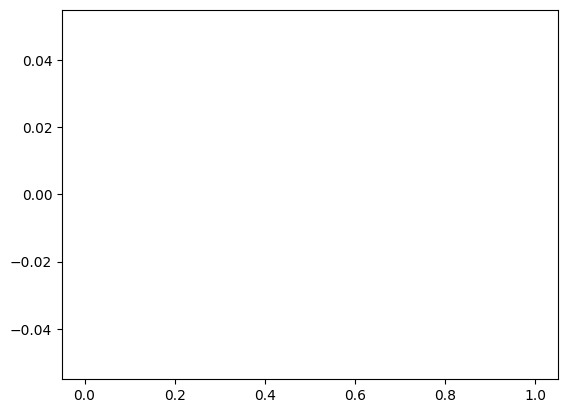

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('breakeven_s_values.csv')
df = df[df['breakeven_s'] > 0.0001]
df = df[df['gamma'] == 0.001]
# draw histogram of the breakeven s values
plt.hist(df['breakeven_s'], bins=100)
plt.show()
